# Exploratory Data Analysis

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 5 - Exploratory Data Analysis.**

In [25]:
# Mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Membaca Data

In [26]:
df = pd.read_csv(r'../datasets/iris-missing.csv')

## Keterangan Kolom

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  143 non-null    float64
 1   sepal-width   50 non-null     float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Persentase Data Kosong

In [28]:
df.isnull().sum() / len(df) * 100

sepal-length     4.666667
sepal-width     66.666667
petal-length     0.000000
petal-width      0.000000
class            0.000000
dtype: float64

## Statistik Deskriptif

In [29]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,143.000000,50.000000,150.000000,150.000000
mean,5.845455,2.974000,3.758667,1.198667
std,0.848173,0.322497,1.764420,0.763161
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.175000,5.100000,1.800000
max,7.900000,3.800000,6.900000,2.500000


## Sampel Data

In [30]:
# Menampilkan data teratas (default = 5)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,NaN,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,NaN,1.3,0.2,Iris-setosa
3,4.6,NaN,1.5,0.2,Iris-setosa
4,5.0,NaN,1.4,0.2,Iris-setosa


In [31]:
# Menampilkan data terbawah (default = 5)
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Tabel Pivot

In [32]:
# Agregasi jumlah data berdasarkan spesies
pd.pivot_table(df, index=["class"], aggfunc=np.sum)

,petal-length,petal-width,sepal-length,sepal-width
class,,,,
Iris-setosa,73.2,12.2,244.5,0.0
Iris-versicolor,213.0,66.3,279.4,0.0
Iris-virginica,277.6,101.3,312.0,148.7


In [33]:
# Agregasi jumlah dan rata-rata data berdasarkan spesies
pd.pivot_table(df, index=["class"], aggfunc=[np.sum, np.mean])

sum                                       \
                petal-length petal-width sepal-length sepal-width   
class                                                               
Iris-setosa             73.2        12.2        244.5         0.0   
Iris-versicolor        213.0        66.3        279.4         0.0   
Iris-virginica         277.6       101.3        312.0       148.7   

                        mean                                       
                petal-length petal-width sepal-length sepal-width  
class                                                              
Iris-setosa            1.464       0.244     4.989796         NaN  
Iris-versicolor        4.260       1.326     5.944681         NaN  
Iris-virginica         5.552       2.026     6.638298       2.974

## Charting

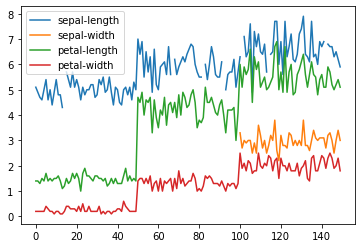

In [34]:
# Plot default Pandas
df.plot()

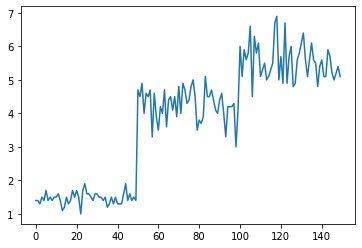

In [35]:
# Line chart
df["petal-length"].plot.line()

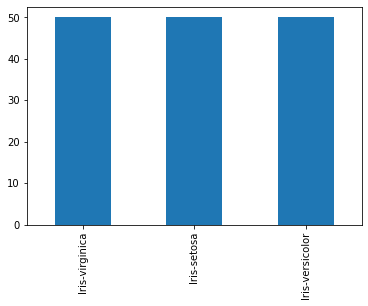

In [36]:
# Bar chart
df["class"].value_counts().plot(kind="bar")

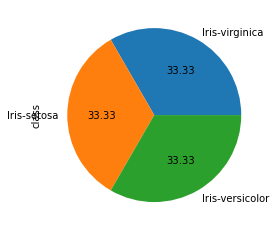

In [37]:
# Pie chart
df["class"].value_counts().plot(kind="pie", autopct='%.2f')

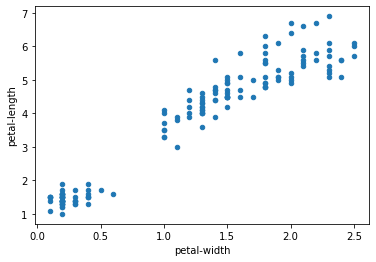

In [38]:
# Scatter chart
df.plot.scatter(x='petal-width', y='petal-length');

## Plotting

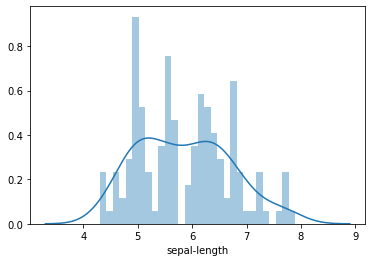

In [39]:
# Distribution plot
sns.distplot(df['sepal-length'], bins=30)

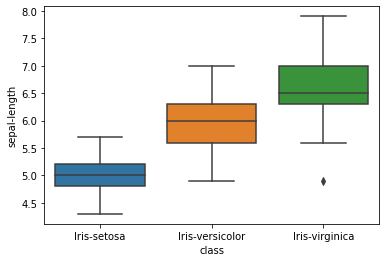

In [40]:
# Box plot
sns.boxplot(x="class", y="sepal-length", data=df)

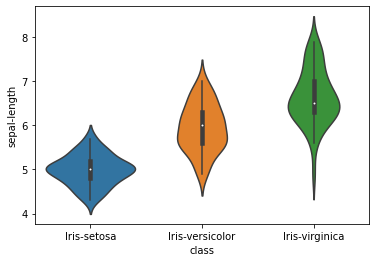

In [41]:
# Violin plot
sns.violinplot(x="class", y="sepal-length", data=df)

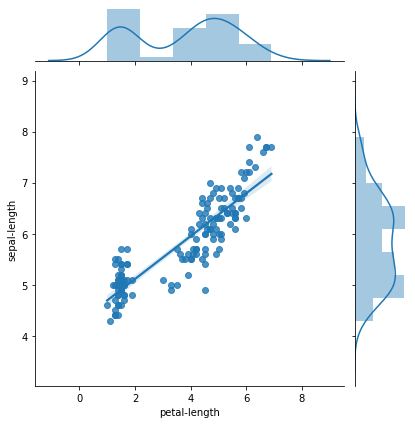

In [42]:
# Joint plot
sns.jointplot(x="petal-length", y="sepal-length", data=df, kind='reg')

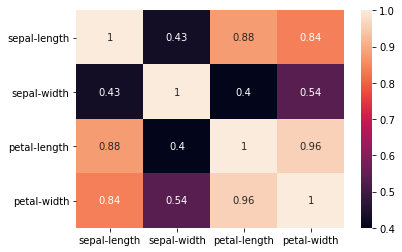

In [43]:
# Correlation heatmap
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

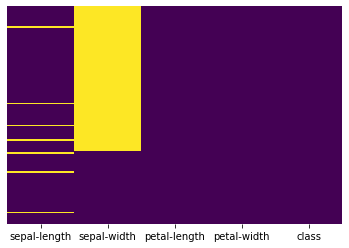

In [44]:
# Missing values heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

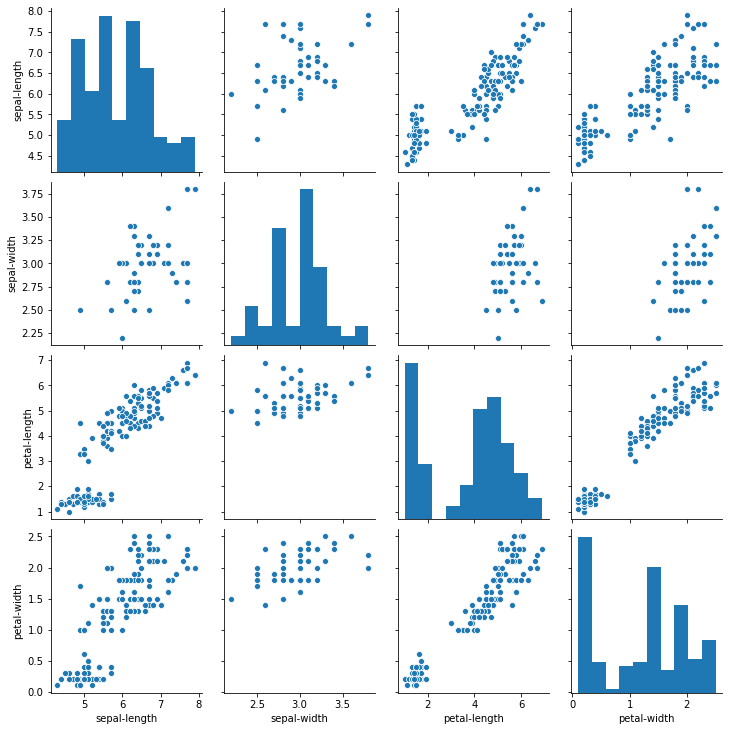

In [45]:
# Scatter plot dan distribution plot (pair plot)
sns.pairplot(df)

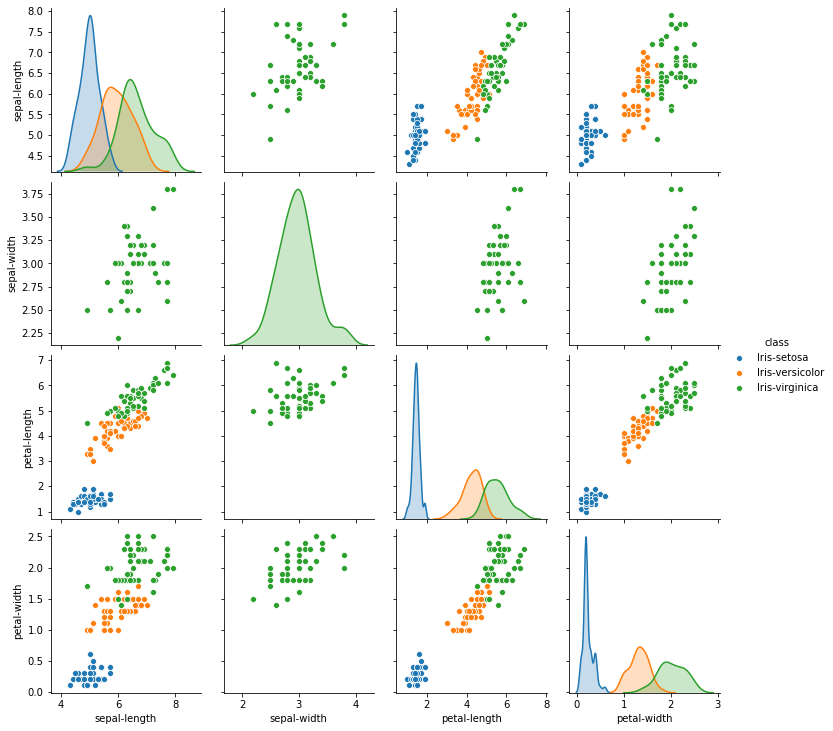

In [46]:
# Scatter plot dan kernel density estimation plot (pair plot)
sns.pairplot(df, hue="class")

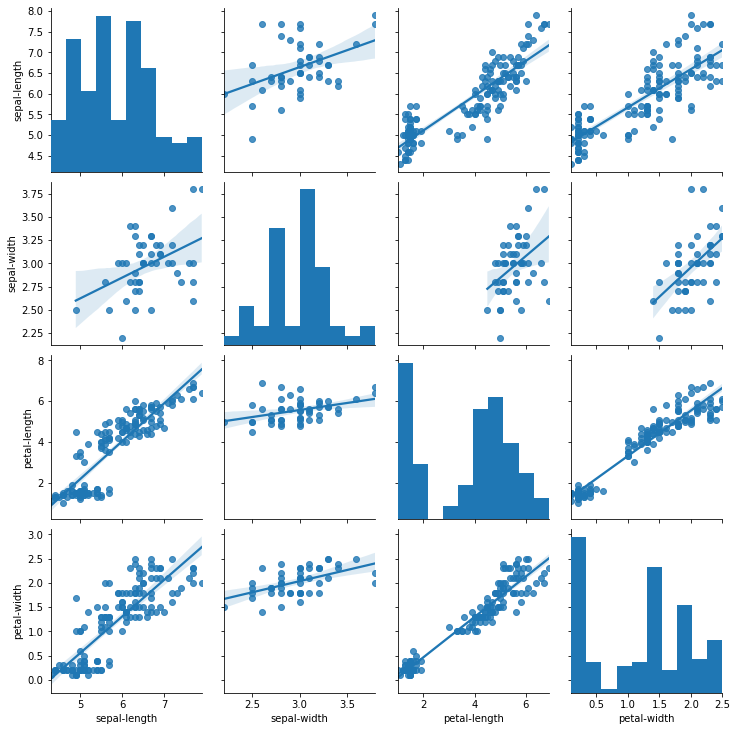

In [47]:
# Scatter plot dengan regression line dan distribution plot (pair plot)
sns.pairplot(df, kind="reg")